In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras import layers, models
from keras.datasets import imdb

Using TensorFlow backend.
/Users/atvaccaro/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
max([max(sequence) for sequence in train_data])

9999

In [14]:
word_index = imdb.get_word_index()
def decode(review):
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
    return decoded_review

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 307us/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3003 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 3s 195us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1148 - acc: 0.9654 - val_loss: 0.3146 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.0978 - acc: 0.9706 - val_loss: 0.3130 - 

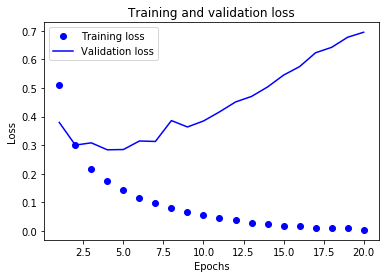

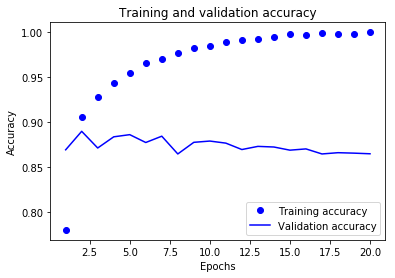

In [8]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 178us/step - loss: 0.5325 - acc: 0.7916 - val_loss: 0.4061 - val_acc: 0.8699
Epoch 2/4
15000/15000 [==============================] - 2s 152us/step - loss: 0.3254 - acc: 0.8996 - val_loss: 0.3152 - val_acc: 0.8852
Epoch 3/4
15000/15000 [==============================] - 2s 155us/step - loss: 0.2357 - acc: 0.9241 - val_loss: 0.2827 - val_acc: 0.8897
Epoch 4/4
25000/25000 [==============================] - 5s 219us/step


[0.30206181801795962, 0.87707999999999997]

In [10]:
model.predict(x_test)

array([[ 0.33838961],
       [ 0.99960607],
       [ 0.93660051],
       ..., 
       [ 0.14746602],
       [ 0.19314578],
       [ 0.65383506]], dtype=float32)

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 4s 241us/step - loss: 0.4912 - acc: 0.7977 - val_loss: 0.3862 - val_acc: 0.8641
Epoch 2/4
15000/15000 [==============================] - 3s 176us/step - loss: 0.3071 - acc: 0.9056 - val_loss: 0.3136 - val_acc: 0.8881
Epoch 3/4
15000/15000 [==============================] - 3s 167us/step - loss: 0.2391 - acc: 0.9247 - val_loss: 0.2926 - val_acc: 0.8890
Epoch 4/4
25000/25000 [==============================] - 3s 121us/step


[0.29317520842552186, 0.88475999999999999]

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 179us/step - loss: 0.5423 - acc: 0.7767 - val_loss: 0.4432 - val_acc: 0.8139
Epoch 2/4
15000/15000 [==============================] - 2s 146us/step - loss: 0.3283 - acc: 0.9001 - val_loss: 0.3102 - val_acc: 0.8873
Epoch 3/4
15000/15000 [==============================] - 2s 145us/step - loss: 0.2312 - acc: 0.9258 - val_loss: 0.2924 - val_acc: 0.8854
Epoch 4/4
25000/25000 [==============================] - 3s 127us/step


[0.30266061984062193, 0.87839999999999996]

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 221us/step - loss: 0.1736 - acc: 0.7863 - val_loss: 0.1258 - val_acc: 0.8662
Epoch 2/4
15000/15000 [==============================] - 2s 150us/step - loss: 0.0944 - acc: 0.9019 - val_loss: 0.0955 - val_acc: 0.8887
Epoch 3/4
15000/15000 [==============================] - 3s 170us/step - loss: 0.0668 - acc: 0.9282 - val_loss: 0.0872 - val_acc: 0.8873
Epoch 4/4
25000/25000 [==============================] - 3s 117us/step


[0.092008557610511785, 0.87807999999999997]

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 200us/step - loss: 0.5362 - acc: 0.7773 - val_loss: 0.3959 - val_acc: 0.8708
Epoch 2/4
15000/15000 [==============================] - 2s 153us/step - loss: 0.3112 - acc: 0.9027 - val_loss: 0.3247 - val_acc: 0.8753
Epoch 3/4
15000/15000 [==============================] - 2s 153us/step - loss: 0.2259 - acc: 0.9273 - val_loss: 0.2794 - val_acc: 0.8911
Epoch 4/4
15000/15000 [==============================] - 2s 154us/step - loss: 0.1762 - acc: 0.9443 - val_loss: 0.2747 - val_acc: 0.8889


In [28]:
print(decode(test_data[900]))
model.predict(x_test)[900]

? this movie is in the same league as ? lots of wasted talent who let this bomb escape when ? says an example has to be made in reference to a nuclear bomb i said please let it be this theatre don't waste your time not even worth a free rental and where did they get these ? to fill the comments section on imdb i can't believe that anyone who has ever seen the original series enjoyed this stinker steve carell is not a physical comedian if they removed the comedy and made it a straight action movie it could pass what the heck was the purpose of the dance scene also the fat jokes and references were tasteless this movie never missed a chance to go for the lowest common ? and scenes just ended it seemed as if no one thought them through just awful save your time if not money and give this movie a pass


array([ 0.00243824], dtype=float32)